In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv('gmm_data.csv')

In [71]:
df=data[['cust','count','sum']]
df.groupby('cust').sum()
df

,cust,count,sum
0,M000419293,39,1926900.0
1,M000557840,49,2332838.0
2,M000871427,53,2183060.0
3,M000986912,48,1377870.0
4,M001248380,38,992100.0
...,...,...,...
8015,M999227380,32,3449170.0
8016,M999268192,24,783100.0
8017,M999599111,8,1550082.0
8018,M999770689,122,1535240.0


In [72]:
# 두 가지 feature를 대상
data = df[['count', 'sum']]
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [73]:
df_scale.index=df['cust']
df_scale

,count,sum
cust,,
M000419293,-0.514084,-0.558820
M000557840,-0.328690,-0.476181
M000871427,-0.254532,-0.506672
M000986912,-0.347229,-0.670589
M001248380,-0.532623,-0.749122
...,...,...
M999227380,-0.643859,-0.248923
M999268192,-0.792174,-0.791669
M999599111,-1.088804,-0.635530


In [80]:
# epsilon, 최소 샘플 개수 설정
model = DBSCAN(eps=0.2, min_samples=10)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
model.fit(df_scale)
df_scale['cluster'] = model.fit_predict(df_scale)

In [82]:
df_scale

,count,sum,cluster
cust,,,
M000419293,-0.514084,-0.558820,0
M000557840,-0.328690,-0.476181,0
M000871427,-0.254532,-0.506672,0
M000986912,-0.347229,-0.670589,0
M001248380,-0.532623,-0.749122,0
...,...,...,...
M999227380,-0.643859,-0.248923,0
M999268192,-0.792174,-0.791669,0
M999599111,-1.088804,-0.635530,0


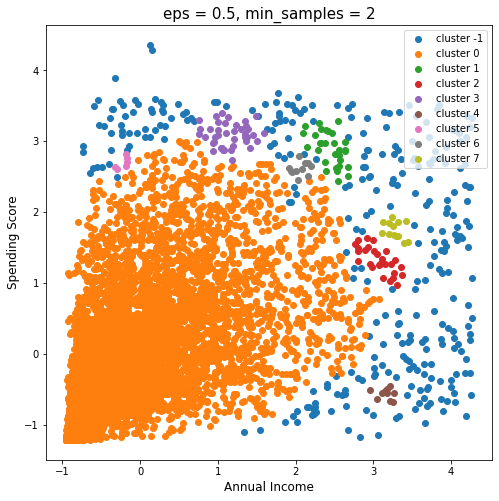

In [81]:
plt.figure(figsize = (8, 8))


# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i, 'sum'], df_scale.loc[df_scale['cluster'] == i, 'count'], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title('eps = 0.5, min_samples = 2', size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()


In [85]:
dbscan_data=pd.merge(df,df_scale,on='cust',how='left')

In [90]:
dbscan_data=dbscan_data.drop(['sum_y','count_y'],axis=1)

In [91]:
dbscan_data.groupby('cluster').mean()

,count_x,sum_x
cluster,,
-1,156.856678,1.749789e+07
0,60.881732,3.959521e+06
1,223.000000,1.665848e+07
2,138.074074,1.971157e+07
3,233.575000,1.030309e+07
4,36.300000,2.017476e+07
5,212.333333,3.579794e+06
6,207.636364,1.476989e+07
7,160.923077,2.075853e+07


In [92]:
dbscan_data.groupby('cluster').count()

,cust,count_x,sum_x
cluster,,,
-1,307,307,307
0,7576,7576,7576
1,30,30,30
2,27,27,27
3,40,40,40
4,10,10,10
5,6,6,6
6,11,11,11
7,13,13,13
